In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

In [111]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15, 10)

In [2]:
path = 'https://stepik.org/media/attachments/lesson/383837/games.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.shape

(16598, 11)

In [6]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [8]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
df = df.dropna()

In [12]:
df.shape

(16291, 11)

In [18]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [55]:
df.Year.value_counts().reset_index().iloc[[0,1,2], :]

,index,Year
0,2009.0,1431
1,2008.0,1428
2,2010.0,1257


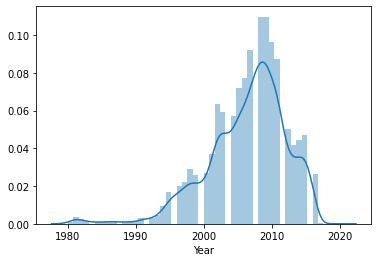

In [60]:
sns.distplot(df.Year)

In [96]:
dfy = df.Platform.value_counts(normalize = True).reset_index()

In [99]:
dfy[dfy.Platform > 0.07].iloc[:,0].to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [87]:
df_2 = df.query('Year in @dfy')

In [88]:
df_2.Platform.value_counts().

DS      1600
Wii     1048
X360     624
PSP      583
PS3      572
PS2      539
PC       336
GBA        5
GC         4
XB         4
DC         2
Name: Platform, dtype: int64

In [101]:
df.Publisher.value_counts().reset_index().iloc[0]

index        Electronic Arts
Publisher               1339
Name: 0, dtype: object

In [113]:
df_Nintendo = df[df.Publisher == 'Nintendo']

In [114]:
df_Nintendo.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


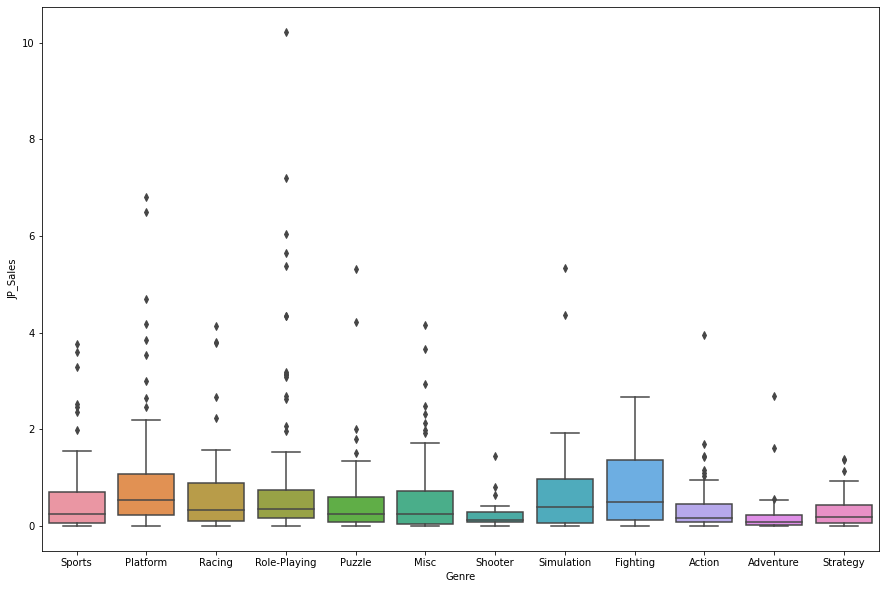

In [115]:
sns.boxplot(x = df_Nintendo.Genre, y = df_Nintendo.JP_Sales)

In [116]:
lst1 = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']

In [118]:
df_Nintendo_2 = df_Nintendo.query('Genre in @lst1')

In [122]:
df_Nintendo_2.groupby(['Genre', 'Year'], as_index = False).agg({'Global_Sales': 'sum'})

,Genre,Year,Global_Sales
0,Fighting,1987.0,5.42
1,Fighting,1993.0,2.00
2,Fighting,1995.0,3.20
3,Fighting,1996.0,0.99
4,Fighting,1999.0,5.55
...,...,...,...
109,Sports,2010.0,2.18
110,Sports,2012.0,1.05
111,Sports,2013.0,1.69
112,Sports,2014.0,0.88


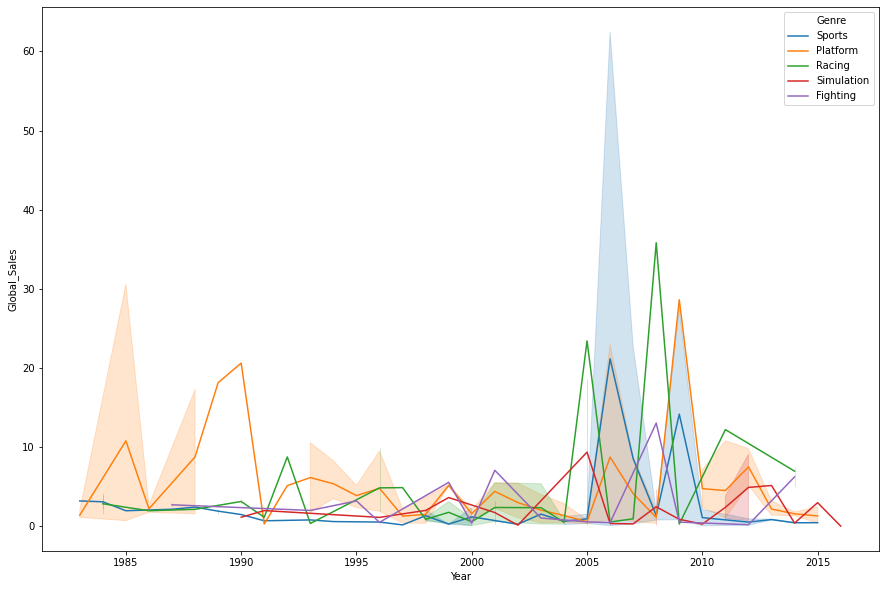

In [125]:
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data = df_Nintendo_2)